# Test 2

> Test Fast.ai models with a simple supervised learning test

In [140]:
#| default_exp test2

In [2]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

/home/biagio/miniconda3/envs/n2m/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

7


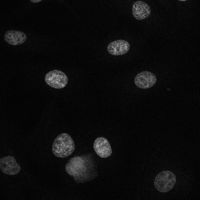

In [4]:
fnames = get_image_files(path_train_raw)
print(parent_label(fnames[0]))
Image.open(fnames[0]).to_thumb(200)

In [5]:
#| export
def get_gt(fn): return path_train_gt/f"{parent_label(fn)}"/"avg50.png"

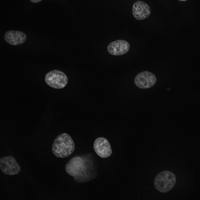

In [6]:
Image.open(get_gt(fnames[0])).to_thumb(200)

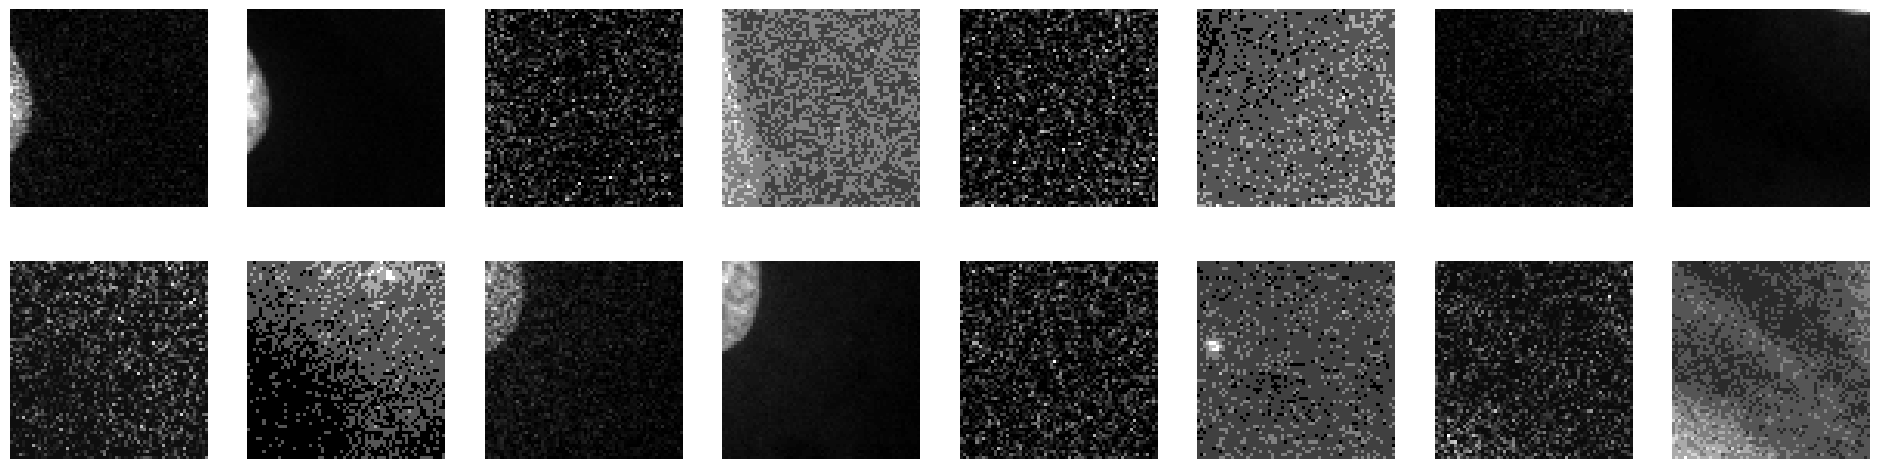

In [7]:
dblock = DataBlock(blocks    = (ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items = get_image_files, 
                   get_y = get_gt,
                   splitter  = RandomSplitter(valid_pct=0.2),
                   item_tfms = RandomCrop(64),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [138]:
# m = create_vision_model(models.resnet18, 1, False, n_in=1)
# print(m.children)


In [ ]:

m = nn.Sequential(*list(m.children())[:-1])
#m.children

mm = DynamicUnet(m, 1, (64,64), norm_type=None)
#mm.children

In [82]:
learn = Learner(dls, mm, loss_func = F.l1_loss)
learn.summary()

DynamicUnet (Input shape: 64 x 1 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    3136       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                       

SuggestedLRs(valley=0.00015848931798245758)

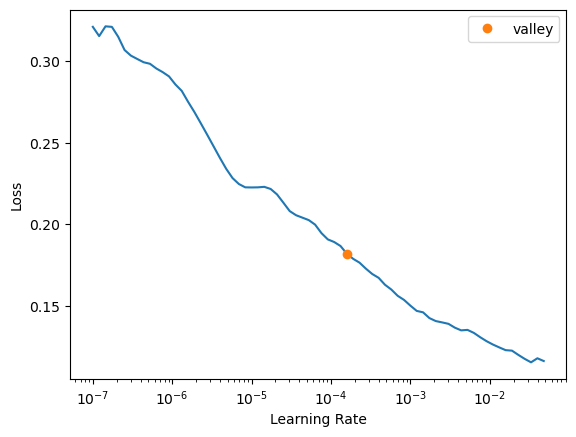

In [74]:
learn.lr_find()
# learn.model

In [77]:
learn.fit_one_cycle(20, lr_max = 1e-04)

epoch,train_loss,valid_loss,time
0,0.030850,0.028528,00:09
1,0.030285,0.027419,00:09
2,0.029217,0.028056,00:09
3,0.029335,0.030798,00:09
4,0.028375,0.029669,00:09
5,0.029241,0.030724,00:09
6,0.029159,0.034731,00:09
7,0.028272,0.024299,00:09
8,0.026246,0.023136,00:09
9,0.024510,0.018637,00:09


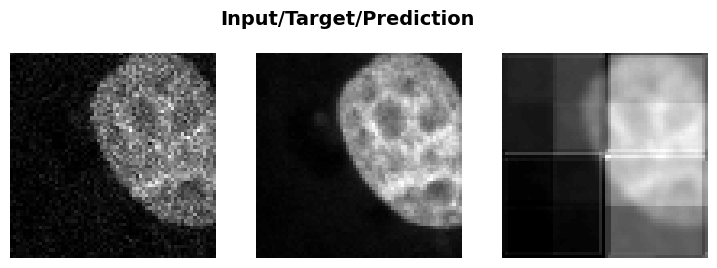

In [86]:
learn.show_results(max_n=1, cmap='gray')

In [131]:
learn = unet_learner(dls, models.resnet18, loss_func=F.l1_loss, n_in=1, n_out=1, pretrained=False, cut=None)
learn.summary()

DynamicUnet (Input shape: 64 x 1 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    3136       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                       

SuggestedLRs(valley=0.0008317637839354575)

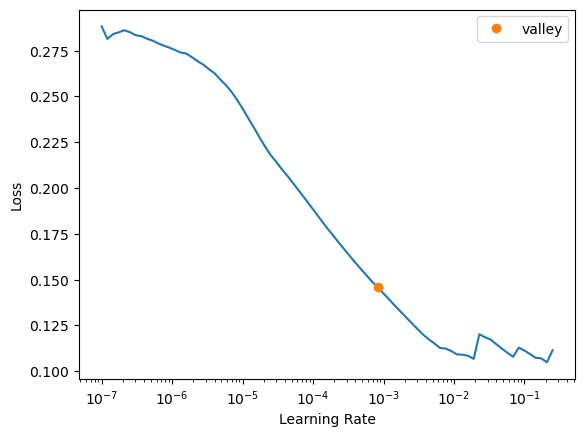

In [132]:
learn.lr_find()

In [134]:
learn.fit_one_cycle(20, lr_max = 1e-03)

epoch,train_loss,valid_loss,time
0,0.119998,0.033405,00:08
1,0.086553,0.033204,00:08
2,0.064085,0.035077,00:08
3,0.048961,0.023216,00:08
4,0.039043,0.014646,00:08
5,0.031334,0.008780,00:08
6,0.025403,0.007374,00:08
7,0.020904,0.007122,00:08
8,0.017694,0.007365,00:08
9,0.015239,0.009402,00:08


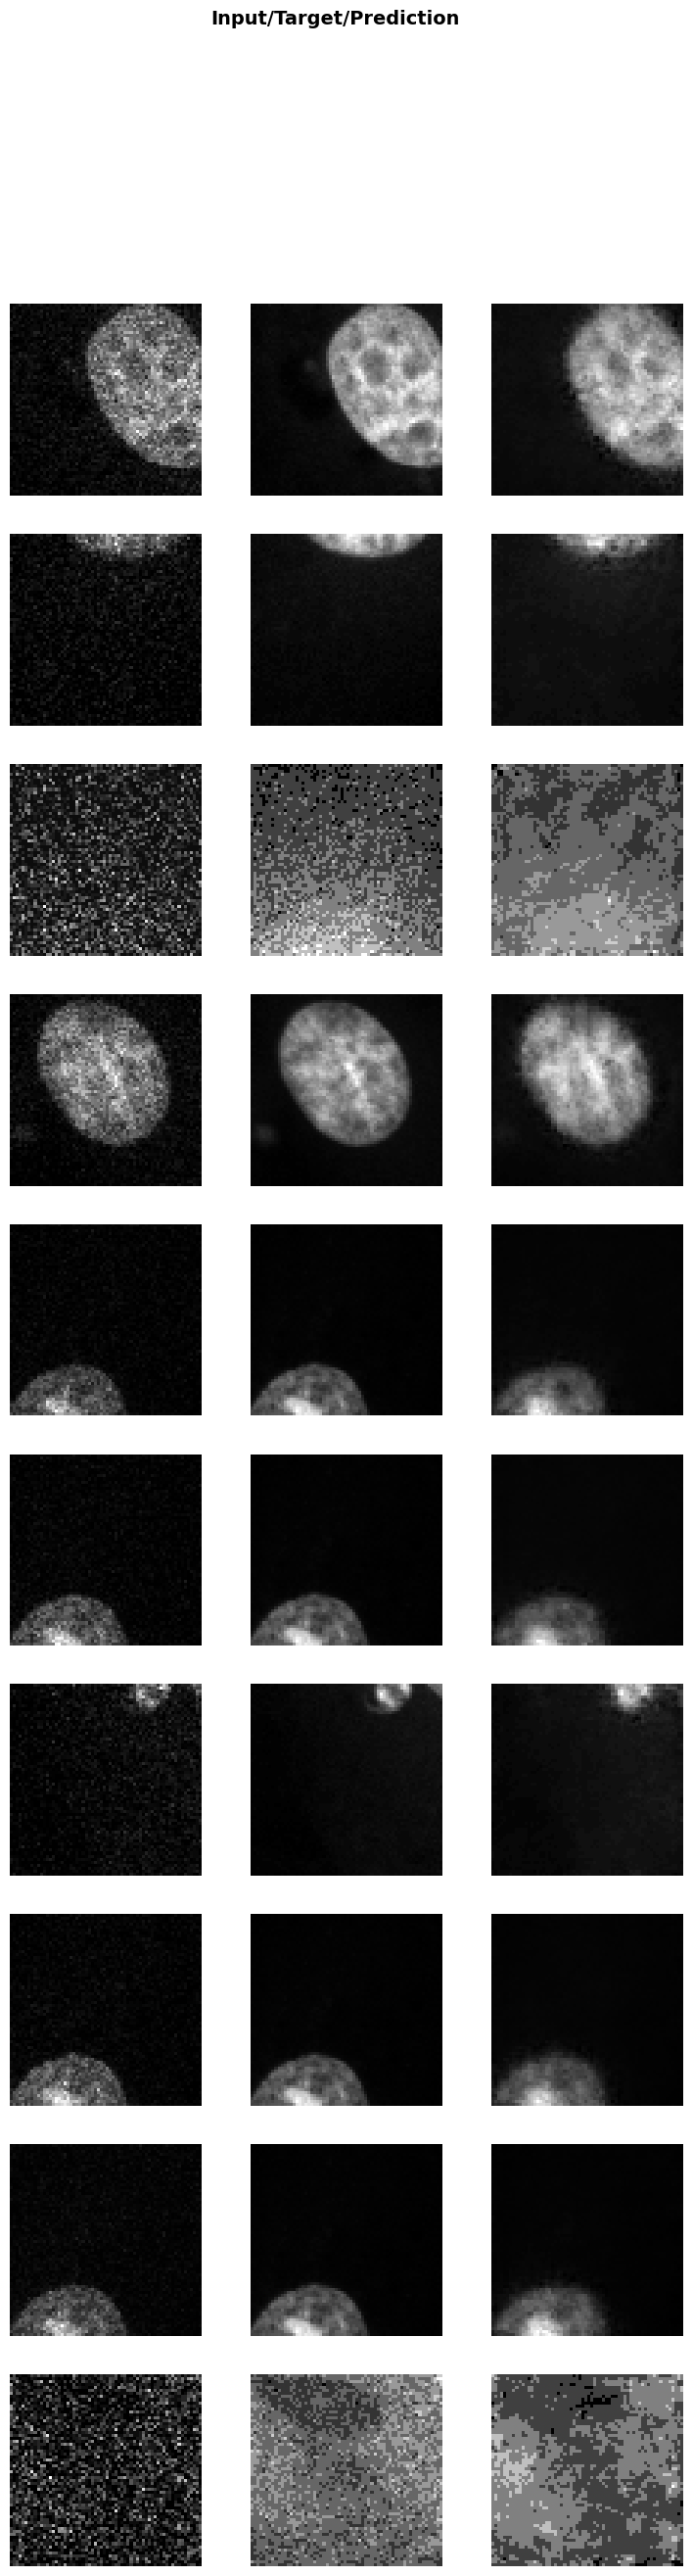

In [137]:
learn.show_results(max_n=10, cmap='gray')

In [136]:
#| hide
import nbdev; nbdev.nbdev_export()